In [1]:
from ASCID_variable import *
from ASCID_fit_shortcut import *
from ASCID_functions import *
from ASCID_analysis import *

Total full data files yet:302
Folder name ../RUN5/Sc46/DAQ\CsI_Sc46_Take4_10
Actual memory of the selected folder: 5.85 G


In [2]:
cut_data=900

In [19]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
data, Data_Time = read_data(files)
energyPlot = data_preprocess(data)
save_fit(energyPlot)
print("Calibration parameter found")
energyPlot = []

file 0 done
file 1 done
file 2 done
file 3 done
file 4 done
file 5 done
file 6 done
file 7 done
file 8 done
file 9 done
file 10 done
file 11 done
file 12 done
file 13 done
file 14 done
file 15 done
file 16 done
file 17 done
file 18 done
file 19 done
file 20 done
file 21 done
file 22 done
file 23 done
file 24 done
file 25 done
file 26 done
file 27 done
file 28 done
file 29 done
file 30 done
file 31 done
file 32 done
file 33 done
file 34 done
file 35 done
file 36 done
Total Time for this data set is 900 s
fit channel 0 done, mean value found (84.0, 108.0), given (83.0, 107.0)
fit channel 1 done, mean value found (174.0, 222.0), given (173.0, 221.0)
fit channel 2 done, mean value found (78.0, 98.0), given (77.0, 97.0)
fit channel 3 done, mean value found (52.0, 66.0), given (51.0, 65.0)
fit channel 4 done, mean value found (102.0, 130.0), given (101.0, 131.0)
fit channel 5 done, mean value found (106.0, 134.0), given (105.0, 133.0)
fit channel 6 done, mean value found (86.0, 108.0), given

In [20]:
energyThreshold_CsI = 100     #int(sys.argv[4])*10    #100    #in keV
timeWindow =  5e-7     #int(sys.argv[3]) * 1e-7  

In [21]:
data = data_calibration(data, energy_source)
data_process = np.array(data).T

# Threshold arrays
Veto_threshold = np.ones(N_det_panel) * energyThreshold[1]
Threshold_CsI = np.ones(N_det_CsI) * energyThreshold[0]
Threshold_null = np.zeros(15)
Threshold = np.concatenate((Threshold_CsI, Threshold_null, Veto_threshold))

# Boolean mask to filter rows that meet the threshold condition
mask = data_process[:, 2] > Threshold[data_process[:, 0].astype(int)]

# Filtered data without intermediate list creation
data = data_process[mask, :3].T
print("Data preprocessing done")



Calibration done
Data preprocessing done


In [22]:
nEvents = len(data[0])
Sig_index=-1
eventTime=0
Timed_Energy_event=[]
for j in range(nEvents):
    if  data[1][j]>eventTime+2*timeWindow and data[0][j] in csiCh:   #Avoiding center detector overlap
        eventTime=data[1][j]
        eventChannel=int(data[0][j])
        Ev_indx=j
        Sig_index+=1
        EventEnergy=data[2][j]
        a=[]
        a.extend([Ev_indx])
        
        while Ev_indx>0 and abs(data[1][Ev_indx-1]-eventTime)<=timeWindow:
            Ev_indx-=1
            a.extend([Ev_indx])
        Ev_indx=j
        
        while Ev_indx<nEvents-1 and abs(data[1][Ev_indx+1]-eventTime)<=timeWindow:
            Ev_indx+=1    
            a.extend([Ev_indx])
        a = np.unique(np.sort(a)) # a contains the index within the defined coincidence window
        Timed_Energy_event.extend([a])
print("data coincidence done")

data coincidence done


In [32]:
multi = np.zeros(50)
for k,j in enumerate(Timed_Energy_event):
    multi[len(j)]+=1

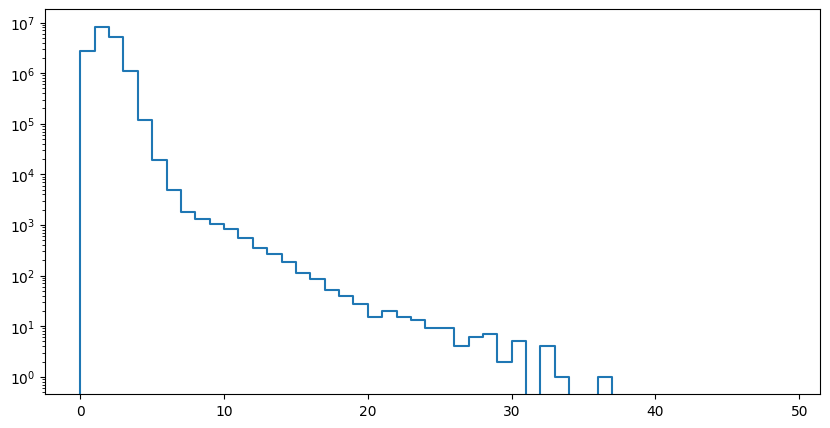

In [35]:
c = np.arange(50)
plt.step(c, multi[0:50])
plt.yscale("log")

In [18]:
data[2][j]

array([5.06000000e+02, 6.30000000e+02, 6.90000000e+02, 6.40000000e+01,
       3.16000000e+02, 1.76638216e+07, 2.82784006e+06, 1.66500465e+06,
       1.63830633e+07, 4.28168947e+06, 1.15265429e+06, 1.63696406e+08,
       3.81673465e+05, 5.46149379e+05, 8.97354155e+05, 4.85424096e+06,
       3.25797289e+05, 2.90584028e+05, 4.94419341e+05, 1.13140925e+04,
       6.06514067e+05, 2.16399374e+06, 1.22611981e+05, 3.63477148e+05,
       6.95905836e+04, 2.66472884e+05, 2.16729460e+04, 6.70347200e+03])

In [16]:
(data[1][j][-1]-data[1][j][1])*1e9

79.99994977581082

In [10]:
j

array([2119631, 2119632, 2119633, 2119634, 2119635, 2119636, 2119637,
       2119638, 2119639, 2119640, 2119641, 2119642, 2119643, 2119644,
       2119645, 2119646, 2119647, 2119648, 2119649, 2119650, 2119651,
       2119652, 2119653, 2119654, 2119655, 2119656, 2119657, 2119658])

In [ ]:
sl=[[],[]]
min_val = [889-1.2*77, 1132-1.2*94, 889-1.2*77]
max_val = [889+1.2*77, 1132+1.2*94, 889+1.2*77]
min_val= np.array(min_val, dtype=int)
max_val = np.array(max_val, dtype=int)
for k,j in enumerate(self.Timed_Energy_event):
event_Channel = self.data[0][j]
event_Energies = self.data[2][j]
# print(event_Channel, event_Energies, k, data[0][k])
# for index, (min_v, max_v) in enumerate(zip(min_val[0:2], max_val[0:2])):
if any(min_val[0] <= element <= max_val[0] for element in event_Energies):
    sl[0].extend([k])
elif any(min_val[1] <= element <= max_val[1] for element in event_Energies):
    sl[1].extend([k])

energy_exclusive = [[], []]
multipliciy_any = np.zeros((100, 2))
for i in range(2):
for k in sl[i]:
    event_Channel = self.data[0][self.Timed_Energy_event[k]]
    event_Energies = self.data[2][self.Timed_Energy_event[k]]
    count_select = 0
    for element in event_Energies:
        if min_val[i]<=element<=max_val[i]:
            energy_select = element
            count_select+=1
    energy_rest = sum(event_Energies) - energy_select
    energy_exclusive[i].extend([energy_rest])
    multipliciy_any[len(event_Channel), i]+=1

any_gamma = ["889", "1132", "889"]
n_exclusive = [[],[]]
for i in range(2):
n,bins, patches=plt.hist(energy_exclusive[i], bins=np.arange(0,2000, 20), histtype="step", label="%d events"%len(energy_exclusive[i]))
self.label("Energy (ADC)", "Counts", 10,5)

count_889= np.zeros(3)
for j in energy_exclusive[i]:
    if j == 0:
        count_889[0]+=1
    elif j<min_val[i+1]:
        count_889[1]+=1
    elif min_val[i+1]<j<max_val[i+1]:
        count_889[2]+=1
n_exclusive[i] = n
plt.legend(fontsize=14)
textstr = '\n'.join((
        r'$N_0= %d$  = %.2f %%' % (count_889[0], count_889[0]/len(energy_exclusive[i])*100),
        r'$N_{compton}= %d = %.2f %%' % (count_889[1], count_889[1]/len(energy_exclusive[i])*100),
        r'$N_{%s}= %d = %.2f %%' % (any_gamma[i+1], count_889[2], count_889[2]/len(energy_exclusive[i])*100)
        ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1200, max(n)*0.8, textstr, fontsize=12,
     verticalalignment='top', bbox=props)
plt.title("Rest energy to the detector at E_1 = %s keV"%(any_gamma[i]), fontsize = 12)
plt.savefig("%s/EnergyRest_%s_%dns_%dkeV.png"%(save_folder_each, any_gamma[i], timeWindow*1e9, energyThreshold_CsI))
plt.close()


count12 = multipliciy_any[:, i]
total = count12.sum()
count12=count12/count12.sum()*100
count12=np.array(count12, dtype="float")
for j in range(len(count12)):
    count12[j]=round(count12[j],2)
data_count = {'1 Det':count12[1], '2 Det':count12[2], '3 Det':count12[3],
    '4 Det':count12[4], '5 Det':count12[5], '6 Det':count12[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
    width = 0.4)   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
self.label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution-%s keV (%s)"%(any_gamma[i], self.source), fontsize="15")
plt.savefig("%s/MultiplicityAny_%s_%dns_%dkeV.png"%(save_folder_each, any_gamma[i], timeWindow*1e9, energyThreshold_CsI))
plt.close()

In [ ]:
#All and Inner detector coincidence energy 
if group == "All":
    EventEnergy = self.EventEnergyAll
    EventEnergy_NVeto = self.EventEnergyAll_NVeto
elif group == "inner":
    EventEnergy = self.EventEnergyInner
    EventEnergy_NVeto = self.EventEnergyInner_NVeto
plt.rcParams['figure.figsize'] = [12,5]
n1,bins,patches=plt.hist(EventEnergy, bins=self.Bins,label="%d events, all"%len(EventEnergy), histtype="step")
n2,bins,patches=plt.hist(EventEnergy_NVeto, bins=self.Bins,label="%d events, Veto antocoincidence"%len(EventEnergy_NVeto), histtype="step")
plt.legend(loc="upper left", fontsize=15)
# plt.xticks(np.arange(0, 4000, 250))
self.label("Energy (keV)", "Counts", 12, 5)
plt.title("%s detector coincidence Spectrum %dns %dkeV"%(group, timeWindow*1e9, energyThreshold_CsI), fontsize=14)
plt.grid()
if plot:
    plt.savefig("%s/Energy-%sCoin_%dns_%dkeV.jpg"%(save_folder_each, group, timeWindow*1e9, energyThreshold_CsI))
plt.close()
n_Energy=n1
n_Energy_NVeto=n2

if group == "All":
    self.n_EnergyAll = n_Energy
    self.n_EnergyAll_NVeto = n_Energy_NVeto
elif group == "inner":
    self.n_EnergyInner = n_Energy
    self.n_EnergyInner_NVeto = n_Energy_NVeto
return EventEnergy, EventEnergy_NVeto

In [6]:
data = data_calibration(data, energy_source)
analysis = ASCID_analysis(data, Data_Time)
analysis.data_preprocess()
analysis.coincidence()
analysis.CoaddedEnergy()
analysis.exclusive_search()
analysis.added_energy("All", plot = plottype)
analysis.added_energy("inner", plot = plottype)
analysis.multiplicity(plot = plottype, veto = "Veto")
analysis.multiplicity(plot = plottype, veto = "noVeto")

Calibration done
Data preprocessing done
data coincidence done
0 M events done
1 M events done
2 M events done
3 M events done
4 M events done
5 M events done
6 M events done
7 M events done
8 M events done
9 M events done
10 M events done
11 M events done
12 M events done
13 M events done
14 M events done
15 M events done
16 M events done
17 M events done
grouped energy done


IndexError: index 26 is out of bounds for axis 0 with size 26

In [1]:
a = [1, 2, 3]
if any(i < 2 for i in a):
    print(i)

NameError: name 'i' is not defined

In [ ]:
import time

In [ ]:
for time_window in range(1,11,2):
    timeWindow = time_window*1e-7
    for energyThreshold_CsI in range(60, 140, 20):
        analysis = ASCID_analysis(data, Data_Time)
        analysis.data_preprocess()
        analysis.coincidence()
        analysis.CoaddedEnergy()
        analysis.exclusive_search()
        analysis.added_energy("All", plot = plottype)
        analysis.added_energy("inner", plot = plottype)
        analysis.multiplicity(plot = plottype, veto = "Veto")
        analysis.multiplicity(plot = plottype, veto = "noVeto")
        time.sleep(60)
    print("Time coincidence done for %d ns"%(timeWindow*1e9))